| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./7_Modelos_de_Machine_Learning.ipynb)| [⏩](./9_Tipos_de_Distancias.ipynb)|

# **8. Qué son y cómo crear Meta-Clasificadores o Meta-Regresores: Bagging en Machine Learning con Python**

## **Introducción**

Los meta-clasificadores o meta-regresores son técnicas que combinan múltiples modelos de machine learning individuales para mejorar la precisión y la robustez del rendimiento general. Uno de los métodos más populares de meta-aprendizaje es el ensamblaje Bagging (Bootstrap Aggregating), que combina varios modelos entrenados en conjuntos de datos ligeramente diferentes para reducir la variabilidad y mejorar la generalización.

El ensamblaje Bagging funciona de la siguiente manera:

1. Selecciona múltiples subconjuntos aleatorios (con reemplazo) del conjunto de datos de entrenamiento original.
2. Entrena un modelo base idéntico en cada uno de estos subconjuntos.
3. Para problemas de clasificación, los resultados individuales de los modelos base se combinan usando votación mayoritaria. Para problemas de regresión, se promedian las predicciones de los modelos base.
4. La combinación de los modelos base reduce el sesgo y la variabilidad, lo que generalmente mejora el rendimiento general.

Aquí hay un ejemplo de cómo implementar el ensamblaje Bagging en Python utilizando Scikit-learn:

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo base (árbol de decisión)
base_model = DecisionTreeClassifier(random_state=42)

# Crear el ensamblaje Bagging
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Entrenar el ensamblaje Bagging en el conjunto de entrenamiento
bagging_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del ensamblaje Bagging: {accuracy:.2f}")

Precisión del ensamblaje Bagging: 1.00


En este ejemplo, hemos utilizado el conjunto de datos Iris y un modelo base de árbol de decisión. Luego, hemos creado un ensamblaje Bagging con 10 modelos base. El ensamblaje se entrena en los subconjuntos de datos generados con reemplazo y, finalmente, se evalúa en el conjunto de prueba. La precisión del ensamblaje Bagging se calcula y muestra.

El ensamblaje Bagging es útil cuando se quiere mejorar el rendimiento de un modelo base al reducir la variabilidad y mejorar la generalización. Puede aplicarse a varios tipos de modelos base, como árboles de decisión, regresión logística, etc. Además, es importante ajustar los hiperparámetros, como el número de estimadores (modelos base) y otros parámetros específicos del modelo base.

## **Explicación breve de KNN**

K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Su enfoque es simple: dado un punto de datos desconocido, KNN encuentra los K puntos de datos más cercanos en el conjunto de entrenamiento y luego toma una decisión basada en la mayoría de las etiquetas (clasificación) o el promedio de los valores (regresión) de esos puntos cercanos.

Aquí hay una explicación detallada junto con un ejemplo y código Python:

**Pasos del algoritmo KNN:**

1. **Seleccionar el valor de K:** Especifica el número de vecinos cercanos que se utilizarán para tomar una decisión.

2. **Medir la distancia:** Calcular la distancia entre el punto de consulta y todos los puntos de entrenamiento utilizando una métrica de distancia (comúnmente la distancia euclidiana).

3. **Identificar los K vecinos más cercanos:** Seleccionar los K puntos de entrenamiento más cercanos al punto de consulta en función de la distancia calculada.

4. **Clasificación:** Si es un problema de clasificación, determinar la etiqueta mayoritaria entre los K vecinos y asignarla al punto de consulta.

5. **Regresión:** Si es un problema de regresión, calcular el promedio de los valores de los K vecinos y asignarlo al punto de consulta.

**Ejemplo de KNN en Python:**

Supongamos que queremos clasificar flores Iris en tres clases basadas en dos características: longitud del sépalo y ancho del sépalo. Usaremos el conjunto de datos Iris y Scikit-learn para implementar KNN:

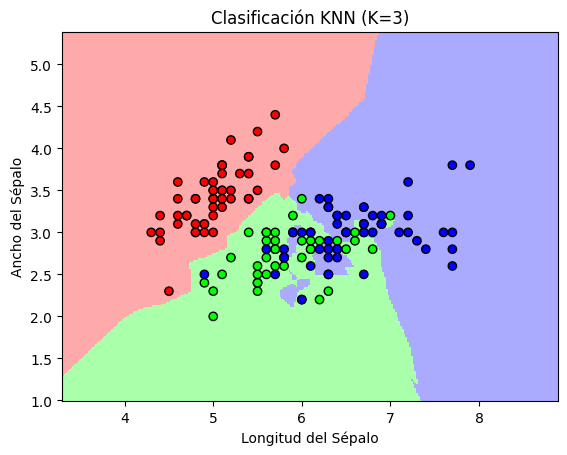

Precisión del modelo KNN: 0.76


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo KNN con K=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo en el conjunto de entrenamiento
knn_model.fit(X_train, y_train)

# Crear una malla para la visualización
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las etiquetas para los puntos de la malla
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Visualizar los resultados
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.title('Clasificación KNN (K=3)')
plt.show()

# Evaluar la precisión en el conjunto de prueba
accuracy = knn_model.score(X_test, y_test)
print(f'Precisión del modelo KNN: {accuracy:.2f}')

En este ejemplo, hemos cargado el conjunto de datos Iris, seleccionado dos características para la clasificación y entrenado un modelo KNN con K=3. Luego, hemos creado una visualización para mostrar cómo el modelo clasifica diferentes regiones en el espacio de características. Finalmente, evaluamos la precisión del modelo en el conjunto de prueba.

## **Metamodelos Bagging**

Los metamodelos Bagging (Bootstrap Aggregating) son una técnica de ensamblaje utilizada en el aprendizaje automático para mejorar la precisión y la generalización de los modelos base. Bagging implica entrenar varios modelos base independientes en diferentes subconjuntos de datos creados mediante el muestreo con reemplazo y luego combinar sus predicciones para obtener una predicción final más robusta y estable. Esto es particularmente útil cuando se trabaja con modelos sensibles al ruido y la varianza.

Aquí tienes una explicación detallada junto con un ejemplo de Bagging utilizando la biblioteca Scikit-learn en Python:

**Pasos para Bagging:**

1. **Generar subconjuntos de datos:** Mediante el muestreo con reemplazo, se crean múltiples subconjuntos de datos de tamaño igual al original.

2. **Entrenar modelos base:** Se entrenan modelos base (pueden ser del mismo tipo o diferentes) en cada uno de los subconjuntos de datos generados en el paso anterior.

3. **Realizar predicciones individuales:** Cada modelo base realiza predicciones individuales en el conjunto de prueba.

4. **Combinar predicciones:** Las predicciones de los modelos base se combinan para producir una predicción final, que puede ser una votación mayoritaria en el caso de clasificación o un promedio en el caso de regresión.

**Ejemplo de Bagging en Python:**

Supongamos que queremos utilizar Bagging para mejorar un clasificador de árbol de decisión en el conjunto de datos Iris:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un clasificador de árbol de decisión como modelo base
base_model = DecisionTreeClassifier()

# Crear el modelo Bagging con 10 estimadores
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Entrenar el modelo Bagging en el conjunto de entrenamiento
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Calcular la precisión del modelo Bagging
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Bagging: {accuracy:.2f}')

Precisión del modelo Bagging: 1.00


En este ejemplo, hemos utilizado un clasificador de árbol de decisión como modelo base y creamos un modelo Bagging con 10 estimadores. Luego, entrenamos el modelo Bagging en el conjunto de entrenamiento y evaluamos su precisión en el conjunto de prueba.

**Ventajas de Bagging:**

- Reduce la varianza y el sobreajuste de los modelos base.
- Mejora la precisión y la estabilidad de las predicciones.
- Funciona bien con modelos que tienen alta varianza.

**Desventajas de Bagging:**

- Puede ser computacionalmente intensivo debido al entrenamiento de múltiples modelos base.
- No necesariamente mejora los modelos base si ya son suficientemente precisos.

En resumen, Bagging es una técnica efectiva para mejorar la precisión y la robustez de los modelos base al promediar o combinar sus predicciones.

| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./7_Modelos_de_Machine_Learning.ipynb)| [⏩](./9_Tipos_de_Distancias.ipynb)|